## Import
Use elements of the scientific python stack

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr

# Import a client
from dask.distributed import Client

# Import intake-esm
import intake

import util

## Setup a PBSCluster
Speed up processing with DASK with 8 threads

In [2]:
cluster = util.get_pbscluster(8)
# Setup your client
client = Client(cluster)
client

/glade/work/marsh/miniconda3/envs/default/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41339 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/marsh/proxy/41339/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/marsh/proxy/41339/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.12.206.46:44758,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/marsh/proxy/41339/status,Total threads: 0
Started: Just now,Total memory: 0 B


## Open a catalog

In [3]:
cat = intake.open_esm_datastore(
    "/glade/work/marsh/intake-esm-catalogs/WACCM6-MA-1deg.json",
    ).search(
    variable=('Uzm'),
    frequency=('day_1')
)
print(cat.keys())
# cat

dict_keys(['atm.cam.h1.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWma1850.f09_g17.release-cesm2.1.3.c20200918', 'atm.cam.h6.b.e21.BWmaCO2x4.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.002', 'atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.003'])


,unique
component,1
stream,2
case,6
member_id,4
variable,1
start_time,68
end_time,70
time_range,72
long_name,1
units,1


In [4]:
dsets = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 8}, 'decode_times': False})
dsets.keys()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.stream.case'


dict_keys(['atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.003', 'atm.cam.h1.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001', 'atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.002', 'atm.cam.h6.b.e21.BWma1850.f09_g17.release-cesm2.1.3.c20200918', 'atm.cam.h6.b.e21.BWmaCO2x4.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001'])

In [11]:
def plot_u(u, case):
    
    print(case)
    fig = u.plot.contourf(y='ilev', 
                          ylim=(100,1), 
                          yincrease=False, 
                          yscale='log',
                          figsize=(15,6), 
                          levels=np.arange(-30,31,2.5)
                         )
    fig.axes.set_ylabel('Pressure (hPa)')
    fig.axes.set_xlabel('Year')
    plt.title('Equatorial zonal mean U')

    plt.show()
    return

In [12]:
hist_cases = [key for key in list(cat) if "HIST" in key]
print(len(hist_cases))

3


atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.003
atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.003


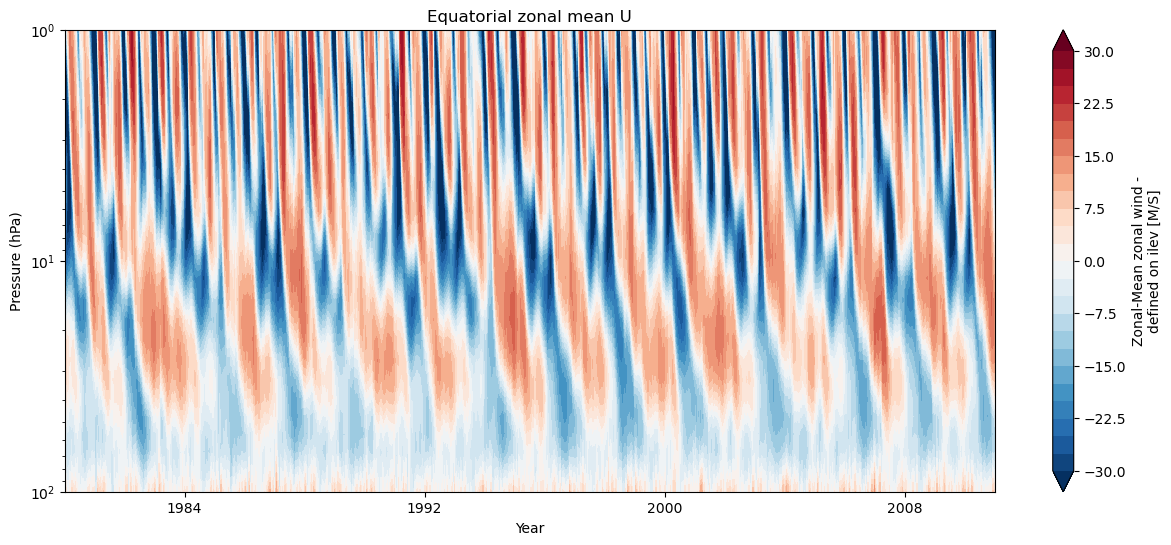

atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001
atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001


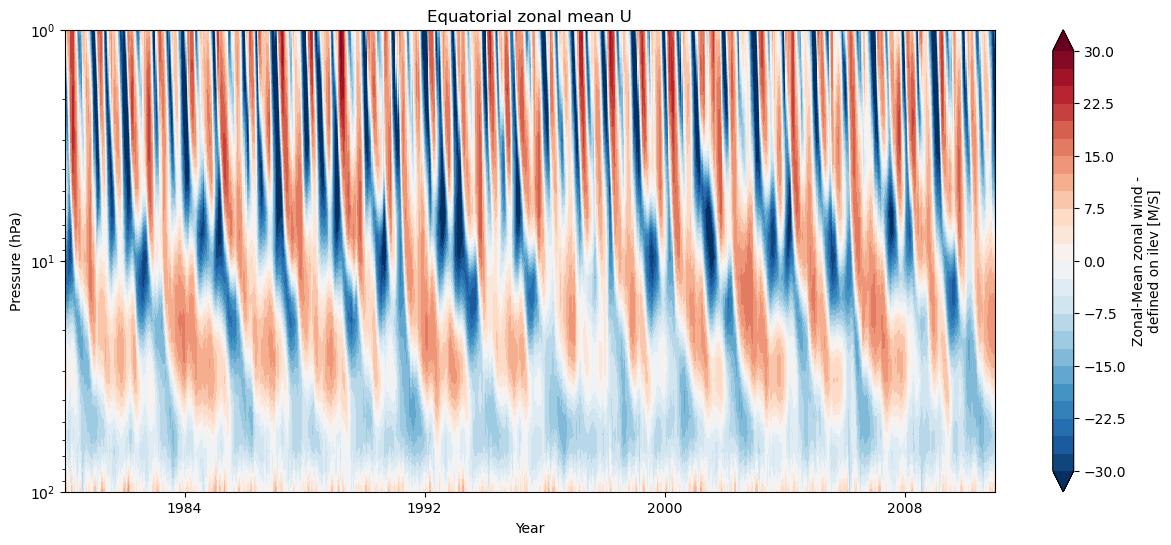

atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.002
atm.cam.h6.b.e21.BWmaHIST.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.002


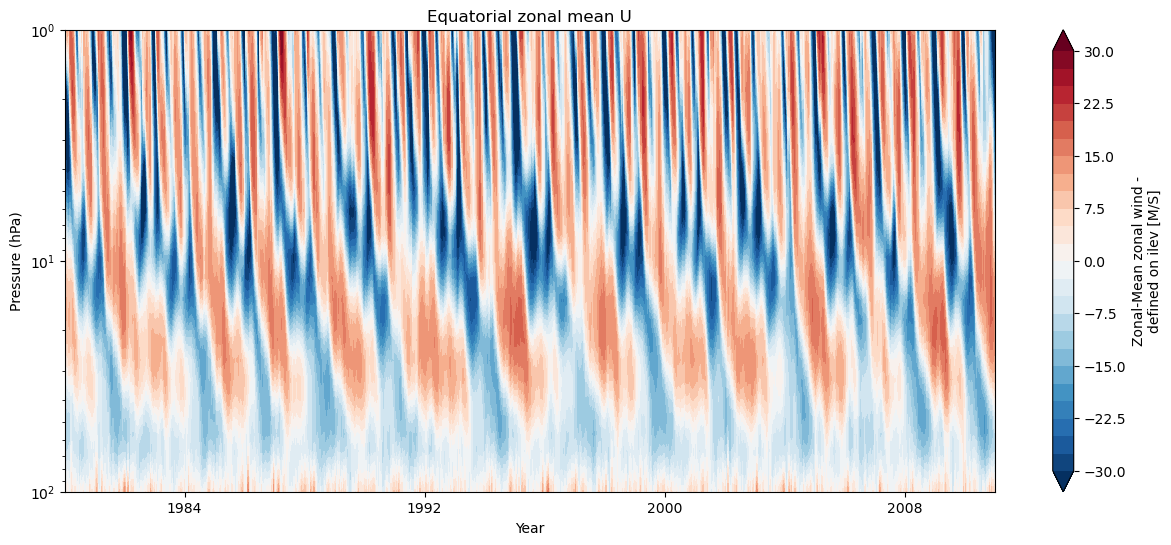

In [17]:
for case in hist_cases:
    # print(case)
    ds = dsets[case]
    ds = xr.decode_cf(ds)
    ds = ds.sortby('time')
    u0 = ds['Uzm'].isel(zlon=0).sel(lat=0.0, method='nearest').sel(time=slice("1980-01", "2010-12"))
    plot_u(u0, case)
    

atm.cam.h1.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001


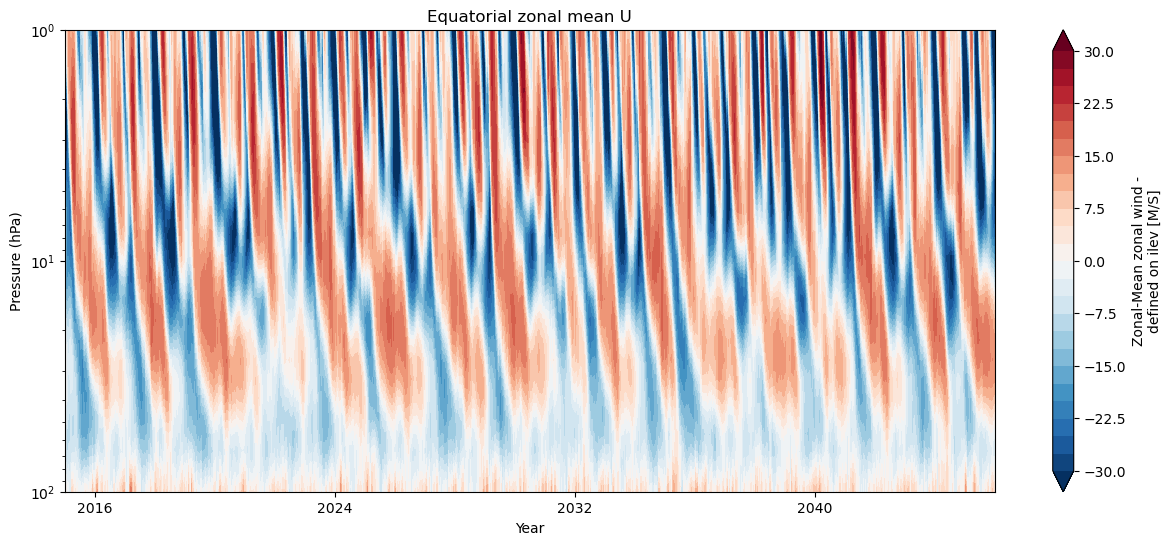

atm.cam.h1.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001


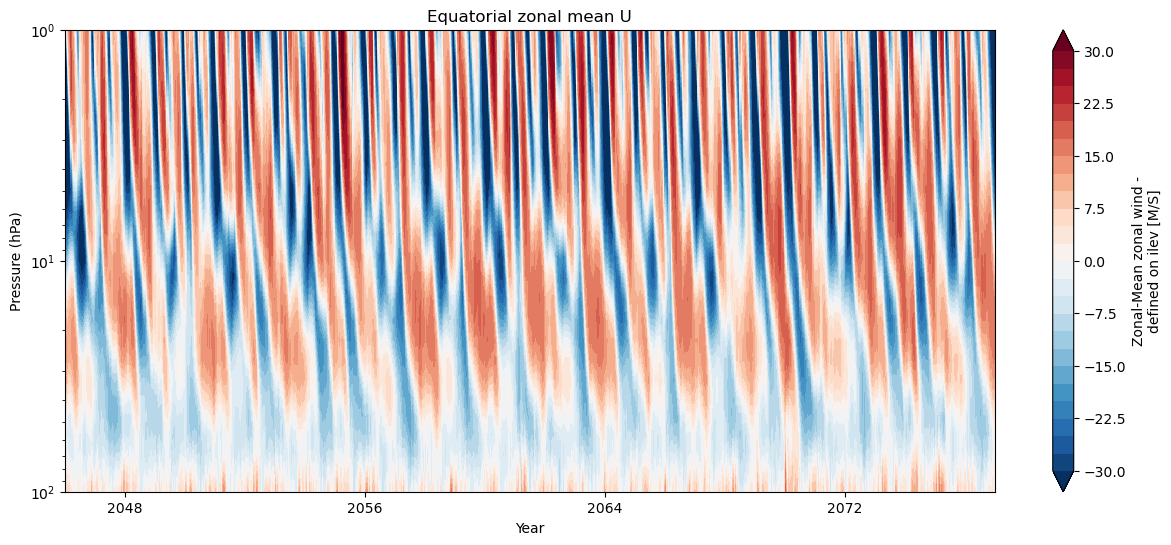

In [20]:
case = 'atm.cam.h1.b.e21.BWSSP245.f09_g17.release-cesm2.1.3.WACCM-MA-1deg.001'

ds = dsets[case]
ds = xr.decode_cf(ds)
ds = ds.sortby('time')
u0 = ds['Uzm'].isel(zlon=0).sel(lat=0.0, method='nearest').sel(time=slice("2015-01", "2045-12"))
plot_u(u0, case)
u0 = ds['Uzm'].isel(zlon=0).sel(lat=0.0, method='nearest').sel(time=slice("2046-01", "2076-12"))
plot_u(u0, case)

